In [20]:
import numpy as np
import pandas as pd
import scipy                    
import statsmodels.api as sm         
import matplotlib.pyplot as plt
import seaborn as sns            #build upon matplotlib
import sklearn

In [21]:
#Load Data
data = pd.read_csv('1.01SimpleLinearRegression.csv')

In [22]:
#SAT to Attend College, College GPA. SAT to predict GPA
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


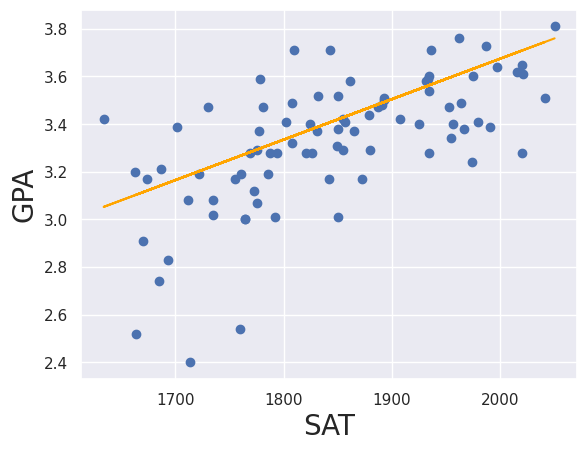

In [23]:
y = data['GPA']
x1 = data['SAT']
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1,yhat, c='orange',label ='regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)

plt.show()

In [26]:
#Regression
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()              #Model Summary, Coefficients Table, and Tests
                               #b0 = 0.2750 (const coef)  and B1/m = 0.0017 (SAT coef)
                               #std err accuracy of prediction for each variable, lower is better est
                               #t, t-stat, P>|t|, p-value < 0.05 is significant
                               #SAT P>|t| = 0.000 is Great predictor of GPA
                               #Null hyp. beta = 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           7.20e-11
Time:                        15:00:53   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### What above means
Dependent Variable 

Model: Ordinary Least Squares - Most Common Method to Estimate Linear Regression; min SSE. Closest to all variable simultaneously. Using calculus, with software

Method: Least Squares (other options: generalized least squares, max likelihood est, bayesian reg, kernel reg, gaussian process reg)

R-Squared
 - variability explained by regression/total variability of dataset
 - 0 - regression explains none of variablity, 1 is perfect explaination
 - 0.2-0.9 is normal range; good value is relative to problem at hand
 - Goodness of Fit. Model to data

# Convert to Seaborn Graphing

In [25]:
sns.set()

# Multiple Regression Model (population model)

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Load Data
data = pd.read_csv('1.02MultipleLinearRegression.csv')

In [3]:
y = data['GPA']
x1 = data[['SAT','Rand 1,2,3']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()
#variable rand 1,2,3 is not a good predictor, and lessens adj r^2

#data['categoricalData'] = data['categoricalData'].map({'Yes':1,'No',0})

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           6.58e-10
Time:                        23:19:38   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### F-statistic
 - test for overall significance of the model
 - null hyp: all betas(coef) are equal to zero
 - lower values are closer to non-significant models
 - p-value is same. closer to 0 is great
 
 
# OLS Assumptions
 - linearity (all independent variables are multiplied by coefficient, each can be plotted as a line)
      - adjust with non-linear regression, exponential transformation, or log transformation
 - no endogenetiy (error cannot be correlated to independent variables) omitted variable bias
      - if present, leads to biased and counterintuitive estimates
 - normality of error term distribution (not required to do regrssion, but essential for proper t-test, f-test)
      - given by central limit theorom in large samples
 - zero mean, having an intercept fixes problem. Uncommon issues
 - homoscedasticity (equal variance) smaller values are Much better predicted than larger ones
      - prevented with ommited variable bias, remove outliers, log transformations(semi-log model)
 - no autocorrelation/no serial correlation (errors are assumed to be unrealated) more common with times models
      - detected by looking for patterns when plotting residuals, durban watson test (2 is good more or less is bad)
 - no multicollinearity (variables can be used to represent each other, var on same f(x))
      - drop one variable, incorporate them together, keep both vv cautiously. easiest to id

In [5]:
new_data = pd.DataFrame({'const':1,'SAT':[1700,1650],'Attendance':[0,1]})
new_data = new_data[['const','SAT','Attendance']]

predictions = results.predict(new_data)
predictions

0    3.107054
1    3.016107
dtype: float64

In [6]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.107054
Alice,1,1650,1,3.016107


# Sklearn
built on numpy, scipy, and matplotlib
very fast and efficient, prefers arrays 
great documentation, variability for many types of models, numerically stable
machine learning package (not for deep learning though)

In [2]:
import numpy as np
import pandas as pd     
import matplotlib.pyplot as plt
import seaborn as sns            #build upon matplotlib
sns.set()

from sklearn.linear_model import LinearRegression
#data = pd.read_csv('1.01SimpleLinearRegression.csv')
data = pd.read_csv('1.02MultipleLinearRegression.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [3]:
x = data[['SAT','Rand 1,2,3']]      #input, feature, independent variable
y = data['GPA']      #ouput, target, dependent variable
#x.shape()
#y.shape()            #check for equal length

#x_matrix = x.values.reshape(-1,1) #make the array 2d

reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [3]:
#reg.score(x_matrix,y)         #r^2
#reg.coef_                     #coeff
reg.intercept_              #intercept

0.29603261264909486

In [14]:
#reg.predict(1740)
newData = pd.DataFrame(data=[1740,1760],columns=['SAT'])
reg.predict(newData)

/home/oakeydokey/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.18905127])

In [4]:
#adjusted R^2  with scilearn
simpleR = reg.score(x,y)         #r for simple and multiple regression
#adusted R^2 values is not a given fuction/method 

## Adjusted R^2 Formula
$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

n = number of observations (1.02 is 84)
p = number of predictors (1.02 2)

In [5]:
n,p = x.shape
#n = 84
#p = 2
adjR2 = 1-(1-simpleR)*(n-1)/(n-p-1)
adjR2

0.39203134825134023

## Feature Selection with F-regression


In [6]:
from sklearn.feature_selection import f_regression
#done for each individual variable. not considering interconnections
#therfore may be too simplistic

In [7]:
fStat, pValues = f_regression(x,y)
pValues.round(3)                      #SAT = 0, Rand 1,2,3 = 0.676
#p-values show relavance, not usefulness

array([0.   , 0.676])

### Summary Table

In [8]:
regSummary = pd.DataFrame(data=x.columns.values,columns=['Features'])
regSummary ['Coefficients'] = reg.coef_
regSummary ['p-values'] = pValues.round(3)
regSummary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


### Standardization/Feature Scaling
$\frac{x-\mu}{\sigma}$

$\mu$ becomes 0

$\sigma$ becomes 1

p-values are not considered (removed) because they have an incredibly low impact (weight)

In [9]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(x)
xScaled = scaler.transform(x)

reg = LinearRegression()
reg.fit(xScaled,y)

LinearRegression()

In [18]:
regSummary = pd.DataFrame(data=[['Bias'],['SAT'],['Rand 1,2,3']],columns=['Features'])
regSummary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]
#weights are the coefficients, larger is more impactful
#intercept is the bias. regression is biased by the intercept


#regSummary ['p-values'] = pValues.round(3)
regSummary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


#### Standardization to Make Predictions

In [20]:
newData = pd.DataFrame(data=[[1700,2],[1800,1]],columns=['SAT','Rand 1,2,3'])
newDataScaled = scaler.transform(newData)

reg.predict(newDataScaled)

array([3.09051403, 3.26413803])

# Overfitting
training set has been so focused on, that it 'missed the point'. low testing accuracy
# Underfitting
model has not caputred underlying logic of the data, results are not accurate

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split

a = np.arange(1,101)
b = np.arange(501,601)

aTrain, aTest, bTrain, bTest = train_test_split(a,b, random_state = 42)       #a is shuffled then split 75/25
#train_test_split(a, test_size = 0.2)      80/20 split
#train_test_split(a, shuffle = False)      doesn't shuffle first
#rerunning code allocates diff values to each set, so R^2 varies 1-2%
#train_test_split(a, random_state = 42)    ensures same style of shuffleing

# Full Example

In [24]:
import numpy as np
import pandas as pd              
import statsmodels.api as sm         
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns          
sns.set()

rawData = pd.read_csv('1.04RealLifeExample.csv')
rawData.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [25]:
rawData.describe(include = 'all')
#model has too many options, and will be described better through other categories
#registration is almost all 'yes', so it isn't a helpful variable


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [27]:
data = rawData.drop(['Model'],axis=1)
data = data.drop(['Registration'],axis=1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,936,NaN,1649,NaN,NaN,2019,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,2012.000000


In [28]:
#price and engineV have missing values
data.isnull().sum()
#if missing values account for less than 5% of total data, just remove them

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
dtype: int64

In [29]:
dataWOMissing = data.dropna(axis=0)

/tmp/ipykernel_13972/3908024413.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataWOMissing['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

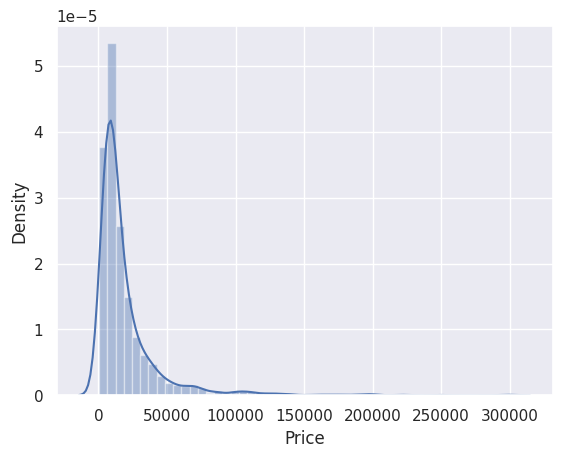

In [30]:
#explore PDF   searching for normal distributions
sns.distplot(dataWOMissing['Price'])


In [37]:
#price seems to have outliers     try removing top 1%
q = dataWOMissing['Price'].quantile(0.99)
da1 = dataWOMissing[dataWOMissing['Price']<q]
#da1describe(include='all')
#sns.distplot(da1['Price'])

q = da1['Mileage'].quantile(0.99)
da2 = da1[da1['Mileage']<q]

da3 = da2[da2['EngineV']<6.5]

q = da3['Year'].quantile(0.01)
da4 = da3[da3['Year']>q]
dataCleaned = da4.reset_index(drop=True)  #reset the old index

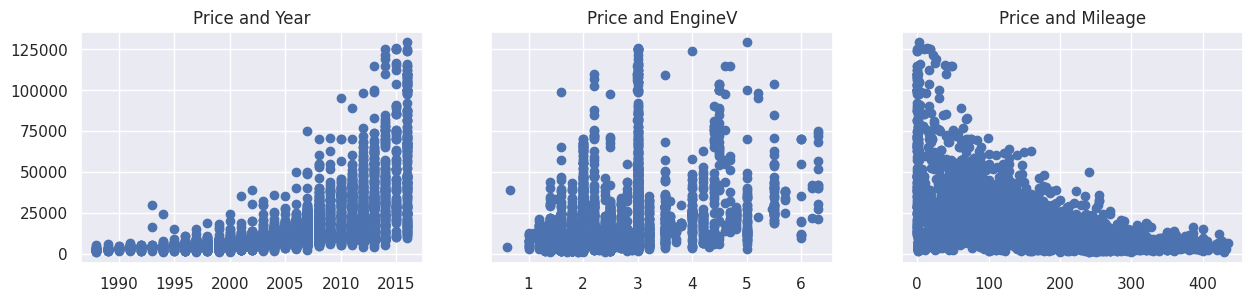

In [38]:
#Check OLS
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(dataCleaned['Year'],dataCleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(dataCleaned['EngineV'],dataCleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(dataCleaned['Mileage'],dataCleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

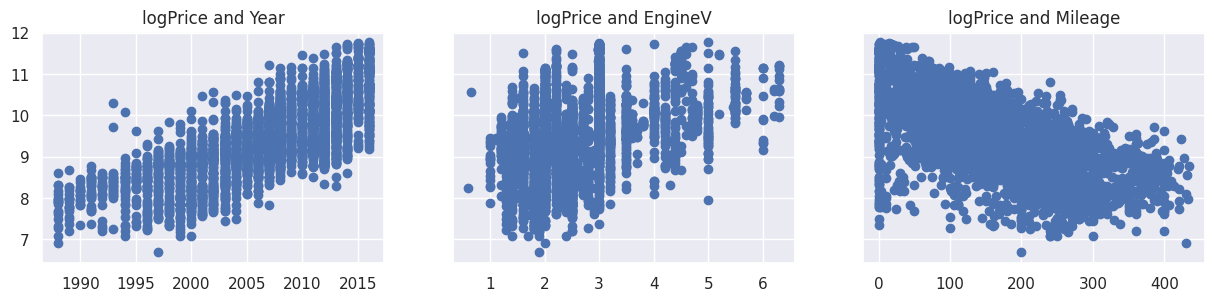

In [44]:
#price is exponentially distributed
#transform with log
logPrice = np.log(dataCleaned['Price'])
dataCleaned['logPrice'] = logPrice

dataCleaned = dataCleaned.drop(['Price'],axis=1)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(dataCleaned['Year'],dataCleaned['logPrice'])
ax1.set_title('logPrice and Year')
ax2.scatter(dataCleaned['EngineV'],dataCleaned['logPrice'])
ax2.set_title('logPrice and EngineV')
ax3.scatter(dataCleaned['Mileage'],dataCleaned['logPrice'])
ax3.set_title('logPrice and Mileage')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

#all assumptions are good (except check multicollinearity)

In [46]:
# sklearn does not have a built-in way to check for multicollinearity
# issue well covered in statistical frameworks and not in ML ones

from statsmodels.stats.outliers_influence import variance_inflation_factor

# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = dataCleaned[['Mileage','Year','EngineV']]

# each variable has its own variance inflation factor
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [49]:
#VIF = 1, no multicolliniearity
#1<VIF<5: perfectly okay
#5 or 6 < VIF: Unacceptable

# removing year will drop the VIF of other variables
dataWOMulticollinearity = dataCleaned.drop(['Year'],axis=1)